In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import seaborn as sns

## Data Preparation

In [2]:
def loadImages(path, urls, target):
    """function to load images from folder into lists
    given file path and urls"""
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path + "/" + urls[i]
        img = cv2.imread(img_path)
        img = img/255.0
        # data too big so need to resize
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels

In [3]:
# make covid images and target arrays
covid_path = 'E:\Documents\GitHub\dsc680\COVID-19_Radiography_Dataset\COVID\images'
covid_url = os.listdir('E:\Documents\GitHub\dsc680\COVID-19_Radiography_Dataset\COVID\images')
covid_img, covid_target = loadImages(covid_path, covid_url, 1)

In [4]:
# checking that it worked
covid_img.shape

(3616, 100, 100, 3)

In [5]:
# do same but for normal images
normal_path = 'E:/Documents/GitHub/dsc680/COVID-19_Radiography_Dataset/Normal/images'
normal_url = os.listdir('E:/Documents/GitHub/dsc680/COVID-19_Radiography_Dataset/Normal/images')
normal_img, normal_target = loadImages(normal_path, normal_url, 0)

In [6]:
# check
normal_img.shape

(10192, 100, 100, 3)

In [7]:
# combine data
imgs = np.r_[covid_img, normal_img]
targets = np.r_[covid_target, normal_target]

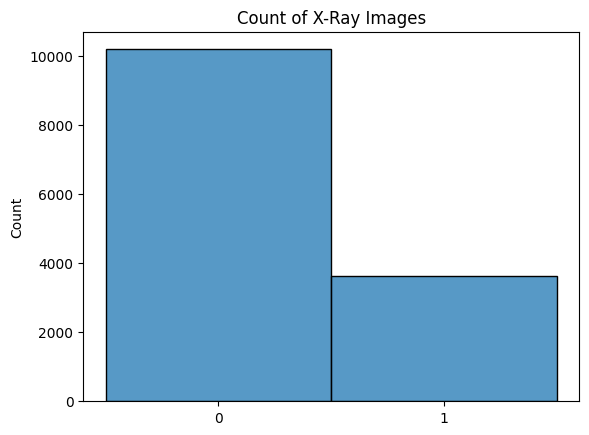

In [27]:
sns.histplot(targets, discrete=True)
plt.xticks([0,1])
plt.title("Count of X-Ray Images")
plt.show()

## Building Binary Model

In [8]:
# splitting data
feat_train, feat_test, target_train, target_test = train_test_split(imgs, targets, test_size=.2)

In [9]:
# building model
model = Sequential()

In [10]:

model.add(Conv2D(32, 3, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# fitting model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history = model.fit(feat_train, target_train, batch_size=32, epochs=12, validation_data=(feat_test, target_test))

Epoch 1/12
346/346 [==============================] - 7s 13ms/step - loss: 0.3856 - accuracy: 0.8193 - val_loss: 0.2840 - val_accuracy: 0.8838
Epoch 2/12
346/346 [==============================] - 4s 11ms/step - loss: 0.2547 - accuracy: 0.8931 - val_loss: 0.2260 - val_accuracy: 0.9156
Epoch 3/12
346/346 [==============================] - 4s 11ms/step - loss: 0.1958 - accuracy: 0.9221 - val_loss: 0.1851 - val_accuracy: 0.9280
Epoch 4/12
346/346 [==============================] - 4s 11ms/step - loss: 0.1656 - accuracy: 0.9364 - val_loss: 0.1883 - val_accuracy: 0.9261
Epoch 5/12
346/346 [==============================] - 4s 11ms/step - loss: 0.1249 - accuracy: 0.9525 - val_loss: 0.1726 - val_accuracy: 0.9359
Epoch 6/12
346/346 [==============================] - 4s 11ms/step - loss: 0.1067 - accuracy: 0.9581 - val_loss: 0.1522 - val_accuracy: 0.9457
Epoch 7/12
346/346 [==============================] - 4s 11ms/step - loss: 0.0851 - accuracy: 0.9685 - val_loss: 0.2211 - val_accuracy: 0.9243

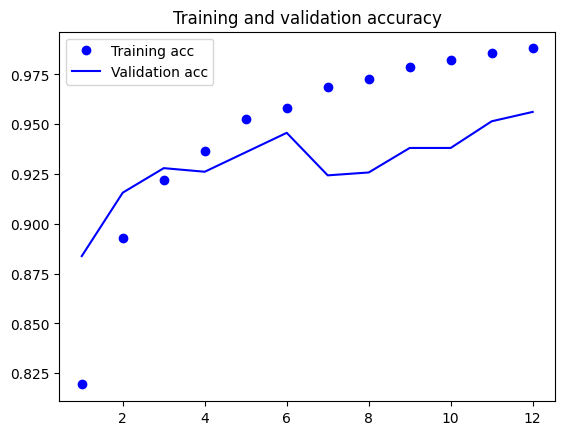

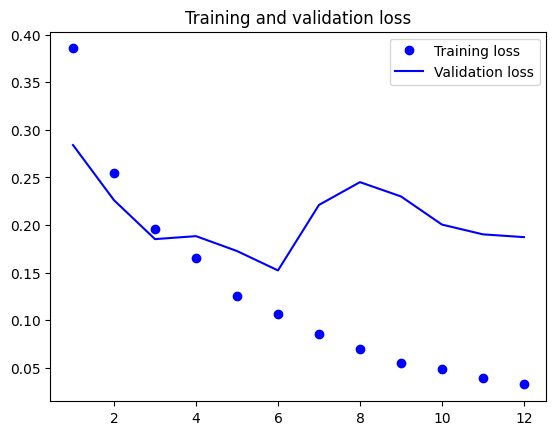

In [12]:
# plotting results
# plotting model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Model has high training accuracy and low training loss but validation loss looks like it's increasing. gonna see if we can bring that down.

In [13]:
model2 = Sequential()

In [14]:
model2.add(Conv2D(32, 3, activation='relu', input_shape=(100, 100, 3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, 3, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [15]:
model2.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history2 = model2.fit(feat_train, target_train, batch_size=32, epochs=15, validation_data=(feat_test, target_test))

Epoch 1/15
346/346 [==============================] - 5s 12ms/step - loss: 0.3643 - accuracy: 0.8350 - val_loss: 0.3203 - val_accuracy: 0.8675
Epoch 2/15
346/346 [==============================] - 4s 10ms/step - loss: 0.2561 - accuracy: 0.8894 - val_loss: 0.2042 - val_accuracy: 0.9240
Epoch 3/15
346/346 [==============================] - 4s 10ms/step - loss: 0.1857 - accuracy: 0.9262 - val_loss: 0.2172 - val_accuracy: 0.9185
Epoch 4/15
346/346 [==============================] - 4s 11ms/step - loss: 0.1295 - accuracy: 0.9492 - val_loss: 0.1541 - val_accuracy: 0.9453
Epoch 5/15
346/346 [==============================] - 4s 12ms/step - loss: 0.0875 - accuracy: 0.9676 - val_loss: 0.2148 - val_accuracy: 0.9359
Epoch 6/15
346/346 [==============================] - 4s 12ms/step - loss: 0.0721 - accuracy: 0.9752 - val_loss: 0.2048 - val_accuracy: 0.9461
Epoch 7/15
346/346 [==============================] - 4s 12ms/step - loss: 0.0359 - accuracy: 0.9871 - val_loss: 0.2400 - val_accuracy: 0.9453

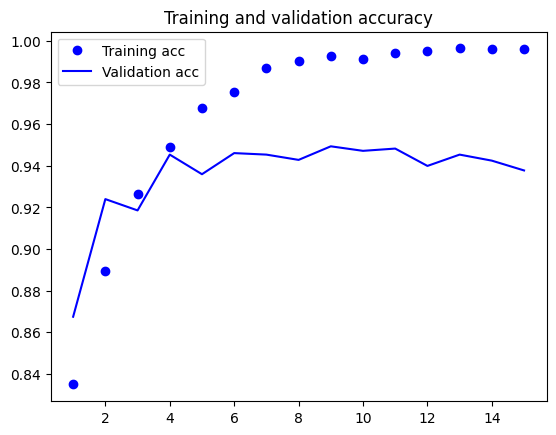

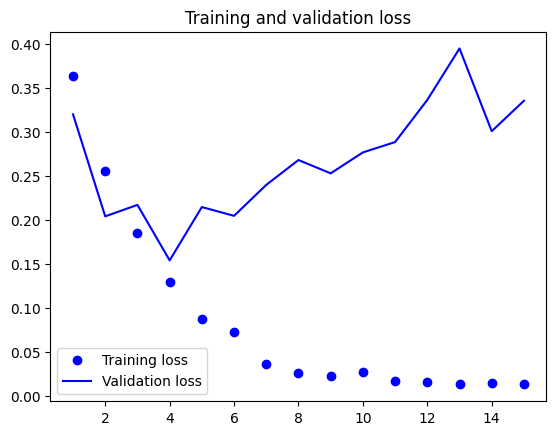

In [16]:
# plotting results
# plotting model
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

validation loss is actually worse. Gonna try re-adding complexity plus dropout layers.

In [30]:
model3 = Sequential()

In [32]:
model3.add(Conv2D(32, 3, activation='relu', input_shape=(100, 100, 3)))
model3.add(MaxPooling2D())
model3.add(Conv2D(16, 3, activation='relu'))
model3.add(MaxPooling2D())
model3.add(Conv2D(16, 3, activation='relu'))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(.5))
model3.add(Dense(1, activation='sigmoid'))

In [34]:
model3.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history3 = model3.fit(feat_train, target_train, batch_size=250, epochs=15, validation_data=(feat_test, target_test))

Epoch 1/15
45/45 [==============================] - 6s 97ms/step - loss: 0.1344 - accuracy: 0.9483 - val_loss: 0.1522 - val_accuracy: 0.9413
Epoch 2/15
45/45 [==============================] - 4s 90ms/step - loss: 0.1055 - accuracy: 0.9598 - val_loss: 0.1409 - val_accuracy: 0.9526
Epoch 3/15
45/45 [==============================] - 4s 92ms/step - loss: 0.0897 - accuracy: 0.9690 - val_loss: 0.1338 - val_accuracy: 0.9504
Epoch 4/15
45/45 [==============================] - 4s 99ms/step - loss: 0.0789 - accuracy: 0.9727 - val_loss: 0.1301 - val_accuracy: 0.9573
Epoch 5/15
45/45 [==============================] - 4s 90ms/step - loss: 0.0598 - accuracy: 0.9783 - val_loss: 0.1299 - val_accuracy: 0.9623
Epoch 6/15
45/45 [==============================] - 4s 92ms/step - loss: 0.0558 - accuracy: 0.9788 - val_loss: 0.1498 - val_accuracy: 0.9558
Epoch 7/15
45/45 [==============================] - 4s 96ms/step - loss: 0.0486 - accuracy: 0.9825 - val_loss: 0.1291 - val_accuracy: 0.9634
Epoch 8/15
45

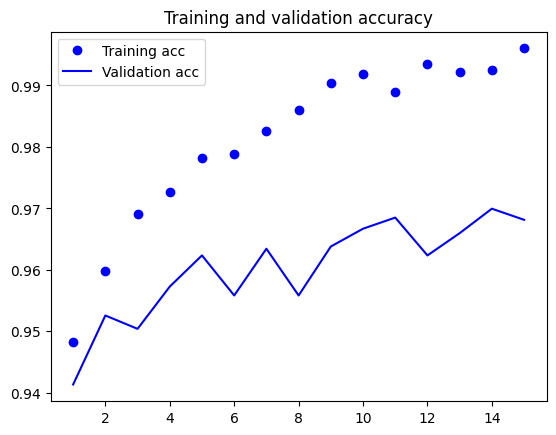

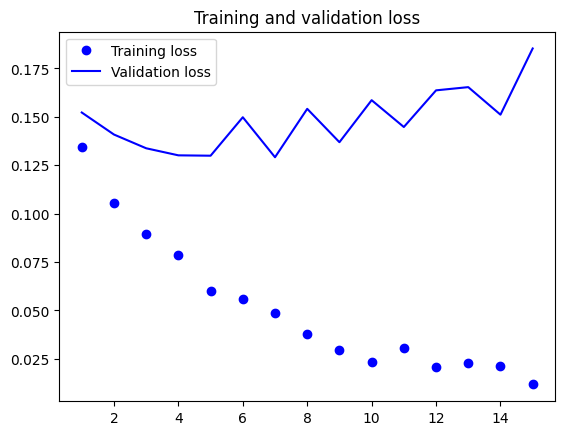

In [35]:
# plotting results
# plotting model
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Best we're going to get. Now let's do it with the pneumonia images as well

In [37]:
model3.save('E:\Documents\GitHub\dsc680\Project 2 Models')

INFO:tensorflow:Assets written to: E:\Documents\GitHub\dsc680\Project 2 Models\assets


INFO:tensorflow:Assets written to: E:\Documents\GitHub\dsc680\Project 2 Models\assets


## Building Multi-Class Model

In [29]:
# make covid images and target arrays
pnm_path = 'E:\Documents\GitHub\dsc680\COVID-19_Radiography_Dataset\Viral Pneumonia\images'
pnm_url = os.listdir('E:\Documents\GitHub\dsc680\COVID-19_Radiography_Dataset\Viral Pneumonia\images')
pnm_img, pnm_target = loadImages(pnm_path, pnm_url, 2)

In [30]:
pnm_img.shape

(1345, 100, 100, 3)

In [31]:
#combine
# combine data
imgs2 = np.r_[covid_img, normal_img, pnm_img]
targets2 = np.r_[covid_target, normal_target, pnm_target]

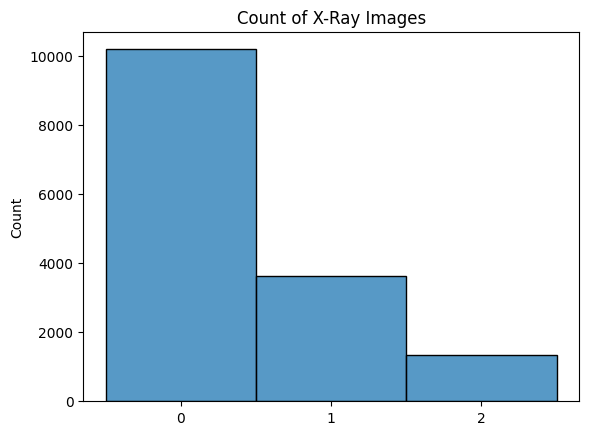

In [33]:
# check breakdown
sns.histplot(targets2, discrete=True)
plt.xticks([0,1, 2])
plt.title("Count of X-Ray Images")
plt.show()

In [47]:
# split data
feat_train, feat_test, target_train, target_test = train_test_split(imgs2, targets2, test_size=.2)

In [53]:
# model time
model4 = Sequential()

In [54]:
model4.add(Conv2D(32, 3, activation='relu', input_shape=(100, 100, 3)))
model4.add(MaxPooling2D())
model4.add(Conv2D(16, 3, activation='relu'))
model4.add(MaxPooling2D())
model4.add(Conv2D(16, 3, activation='relu'))
model4.add(MaxPooling2D())
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(.5))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(.5))
model4.add(Dense(3, activation='softmax'))

In [55]:
model4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history4 = model4.fit(feat_train, target_train, batch_size=250, epochs=15, validation_data=(feat_test, target_test))

Epoch 1/15
49/49 [==============================] - 4s 62ms/step - loss: 0.6801 - accuracy: 0.6998 - val_loss: 0.4523 - val_accuracy: 0.8090
Epoch 2/15
49/49 [==============================] - 2s 51ms/step - loss: 0.4023 - accuracy: 0.8254 - val_loss: 0.3226 - val_accuracy: 0.8680
Epoch 3/15
49/49 [==============================] - 3s 53ms/step - loss: 0.3174 - accuracy: 0.8686 - val_loss: 0.2636 - val_accuracy: 0.9004
Epoch 4/15
49/49 [==============================] - 3s 54ms/step - loss: 0.2822 - accuracy: 0.8852 - val_loss: 0.2368 - val_accuracy: 0.9096
Epoch 5/15
49/49 [==============================] - 3s 52ms/step - loss: 0.2344 - accuracy: 0.9099 - val_loss: 0.2109 - val_accuracy: 0.9211
Epoch 6/15
49/49 [==============================] - 3s 54ms/step - loss: 0.2113 - accuracy: 0.9201 - val_loss: 0.2129 - val_accuracy: 0.9129
Epoch 7/15
49/49 [==============================] - 2s 51ms/step - loss: 0.1926 - accuracy: 0.9254 - val_loss: 0.1758 - val_accuracy: 0.9337
Epoch 8/15
49

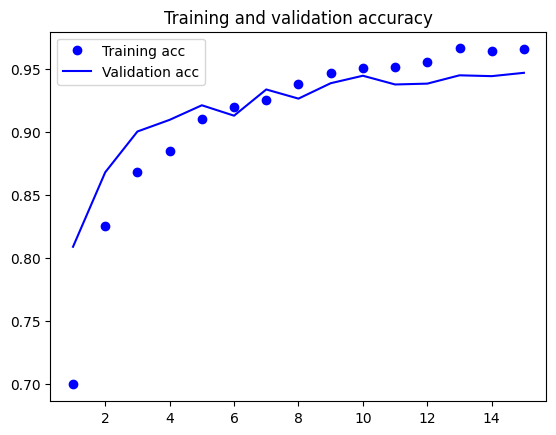

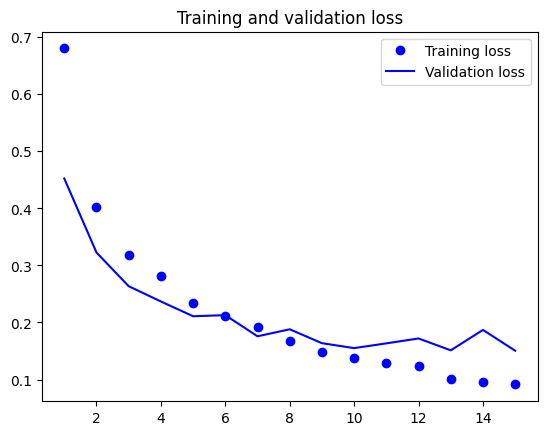

In [56]:
# plotting results
# plotting model
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding in a 3rd classifier actually made the model perform better than just the binary classifier that's interesting. 